In [13]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from sklearn import preprocessing, tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus 
from IPython.display import Image 

# Decision tree > Getting FUND

In [14]:
df=pd.read_json('../01_Preprocessing/First.json').sort_index()

In [15]:
df.head(2)

,country,countryCoded,degree,degreeCoded,eng,engCoded,fieldGroup,fund,gpaBachelors,gpaMasters,gre,highLevelBachUni,highLevelMasterUni,papersGLOB,papersIRAN,targetUni,uniAccepted,uniSelected,year
2,united kingdom,4,Doctorate,1,High,1,7,True,3.5,3.442986,False,False,False,4,8,"heriot watt , edinburgh",n/a,"heriot watt , edinburgh",2007
3,united states,0,Doctorate,1,VeryHigh,0,5,True,2.5,3.500000,True,True,False,8,10,northwestern,"epfl switzerland, northwestern",northwestern,2010


In [16]:
df.columns

Index([u'country', u'countryCoded', u'degree', u'degreeCoded', u'eng',
       u'engCoded', u'fieldGroup', u'fund', u'gpaBachelors', u'gpaMasters',
       u'gre', u'highLevelBachUni', u'highLevelMasterUni', u'papersGLOB',
       u'papersIRAN', u'targetUni', u'uniAccepted', u'uniSelected', u'year'],
      dtype='object')

# DTree Fund For PHD Students

In [17]:
col=['countryCoded', 'engCoded', 'fieldGroup', 'gpaBachelors',
       'gpaMasters', 'gre', 'highLevelBachUni', 'highLevelMasterUni',
       'papersGLOB', 'papersIRAN']
data=df[df.degreeCoded==1][col]
target=df[df.degreeCoded==1].fund
xtr,xte,ytr,yte=train_test_split(data,target,test_size=0.2,random_state=99)

In [18]:
print(xtr.shape,ytr.shape,xte.shape,yte.shape)

((1418, 10), (1418L,), (355, 10), (355L,))


In [19]:
bestAcc=0;depth=0
for i in range(3,10):
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=i)
    clf_entropy.fit(xtr, ytr)
    ypred = clf_entropy.predict(xte)
    acc=accuracy_score(yte,ypred)*100
    if acc>bestAcc:
        bestAcc=acc
        clf=clf_entropy
        depth=i
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=i)
    clf_gini.fit(xtr, ytr)
    ypred = clf_gini.predict(xte)
    acc=accuracy_score(yte,ypred)*100
    if acc>bestAcc:
        bestAcc=acc
        clf=clf_gini

In [20]:
print(bestAcc,depth)

(80.0, 5)


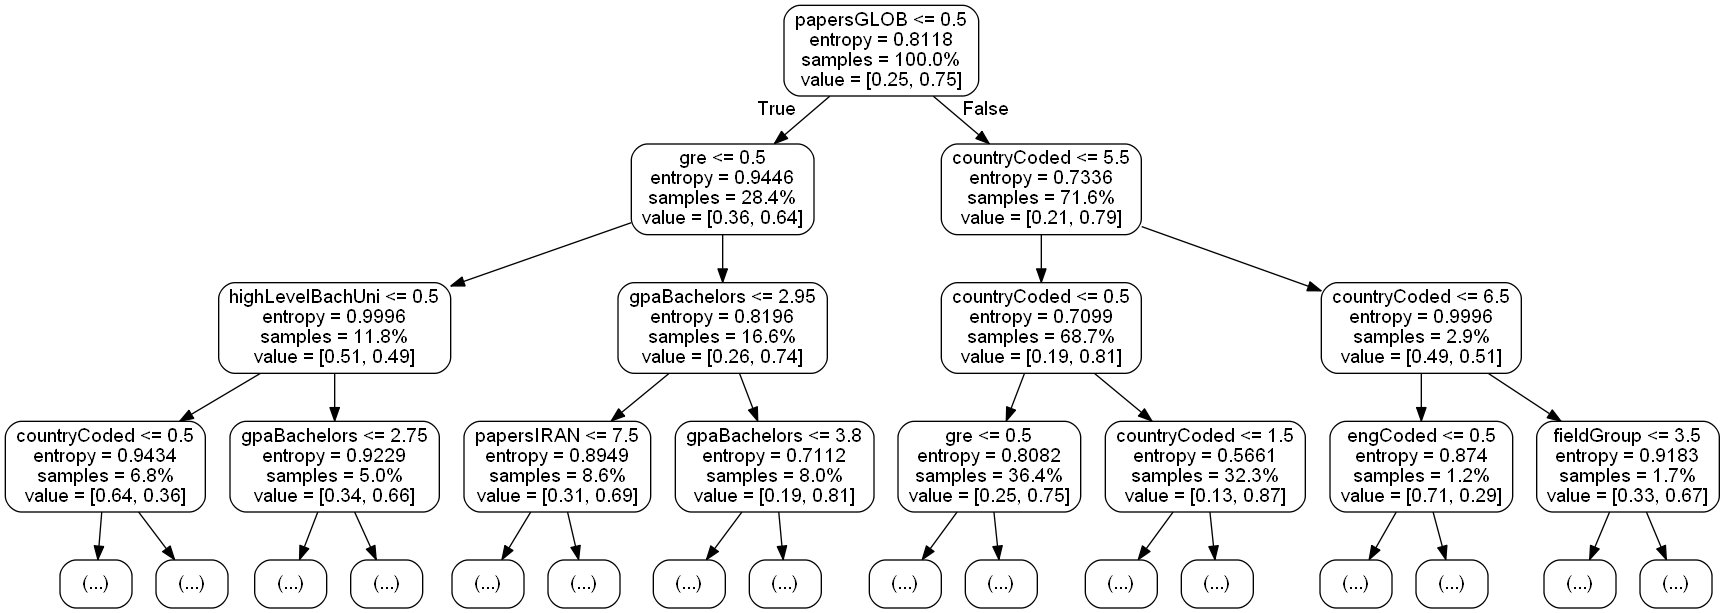

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=3,feature_names=col, proportion=True,rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# For Masters Students

In [22]:
col=['countryCoded', 'engCoded', 'fieldGroup', 'gpaBachelors', 'gre', 'highLevelBachUni','papersGLOB', 'papersIRAN']
xtr,xte,ytr,yte=train_test_split(df[df.degreeCoded==0][col],df[df.degreeCoded==0].fund,test_size=0.2,random_state=99)
bestAcc=0;depth=0
for i in range(3,10):
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=i)
    clf_entropy.fit(xtr, ytr)
    ypred = clf_entropy.predict(xte)
    acc=accuracy_score(yte,ypred)*100
    if acc>bestAcc:
        bestAcc=acc
        clf=clf_entropy
        depth=i
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=i)
    clf_gini.fit(xtr, ytr)
    ypred = clf_gini.predict(xte)
    acc=accuracy_score(yte,ypred)*100
    if acc>bestAcc:
        bestAcc=acc
        clf=clf_gini

In [23]:
print(bestAcc,depth)

(80.911680911680918, 5)


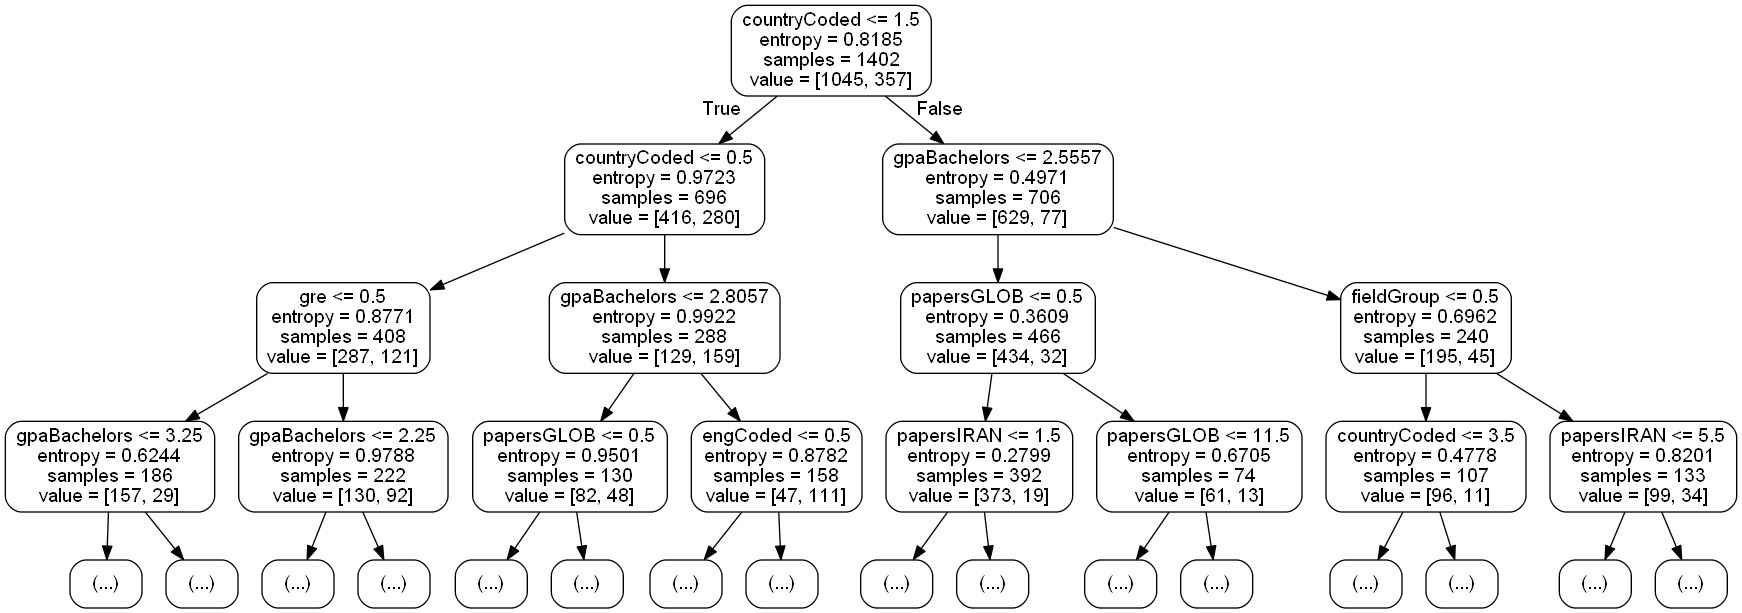

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=col,   max_depth=3, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Sample Path

In [38]:
me=[1,2,0,2.5,False,False,1,0]
clf.decision_path([me]).toarray()

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [41]:
clf.predict([me])

array([ True], dtype=bool)

In [47]:
clf.classes_

array([False,  True], dtype=bool)

In [48]:
clf.predict_proba([me])

array([[ 0.36111111,  0.63888889]])